## 因果推論高度化のための機械学習_理論

機械学習の使用…自動化されたモデル選択・膨大な共変量の考慮<br>
→推定の妥当性向上：①CATEやITEを用いた因果効果の推定②非線形データに対応<br>


CATE（Conditional Average Treatment Effect）とITE（Individual Treatment Effect）は、因果推論における処置効果の異なるレベルを表す概念です。両者は似ているようで、推定の難易度や解釈において重要な違いがあります。以下にその違いを解説します。([GMOインターネットグループ株式会社採用情報][1])

---

 🔹 ITE（Individual Treatment Effect）とは

ITEは、特定の個体に対する処置効果を指します。数式で表すと、ある個体 $i$ におけるITEは以下のようになります：([Zenn][2])

$$
\text{ITE}_i = Y_i^{(1)} - Y_i^{(0)}
$$

ここで、$Y_i^{(1)}$ は処置を受けた場合の結果、$Y_i^{(0)}$ は処置を受けなかった場合の結果です。しかし、現実には同じ個体が同時に処置を受けることと受けないことはできないため、両方の結果を同時に観測することは不可能です。このため、ITEの推定は非常に困難であり、通常は予測モデルを用いて推定されます。([Zenn][3], [codemajin.net][4])

---

 🔹 CATE（Conditional Average Treatment Effect）とは

CATEは、特定の条件（共変量）に基づいた集団における平均的な処置効果を指します。数式で表すと、共変量 $X = x$ におけるCATEは以下のようになります：([codemajin.net][4], [セールスアナリティクス][5])

$$
\text{CATE}(x) = \mathbb{E}[Y^{(1)} - Y^{(0)} | X = x]
$$

CATEは、特定の属性を持つ集団（例えば、年齢や性別など）における平均的な処置効果を推定するものであり、ITEよりも推定が容易です。なぜなら、CATEの推定には、観測可能なデータと特定の仮定（例：無視可能性仮定）を用いることで、比較的信頼性の高い推定が可能だからです。

---

 🔸 ITEとCATEの主な違い

| 特徴     | ITE（個別処置効果）             | CATE（条件付き平均処置効果）    |                                                   |
| ------ | ----------------------- | ------------------- | ------------------------------------------------- |
| 対象     | 個々の個体                   | 特定の条件を満たす集団         |                                                   |
| 推定の難易度 | 非常に高い（反実仮想の推定が必要）       | 比較的低い（観測データと仮定に基づく） |                                                   |
| 解釈の粒度  | 個体レベルの詳細な効果             | 集団レベルの平均的な効果        |                                                   |
| 実用性    | 個別化医療やパーソナライズドマーケティングなど | セグメント分析や政策評価など      | ([セールスアナリティクス][5], [codemajin.net][4], [Zenn][2]) |

---

 🔹 実務での使い分け

* **ITE**：個々の患者に最適な治療法を選択する個別化医療や、個人ごとに最適な広告を表示するパーソナライズドマーケティングなど、個体レベルでの意思決定が求められる場面で有用です。

* **CATE**：特定の属性を持つ集団（例えば、高齢者や特定の地域の住民）に対する政策の効果を評価する際など、集団レベルでの分析や意思決定に適しています。([codemajin.net][4])

---

因果推論において、ITEとCATEは目的や利用シーンに応じて使い分けることが重要です。ITEは個体レベルの詳細な効果を提供しますが、推定が難しく不確実性が高い場合があります。一方、CATEは集団レベルの平均的な効果を提供し、比較的信頼性の高い推定が可能です。目的に応じて適切な指標を選択することが、効果的な意思決定につながります。

[1]: https://recruit.gmo.jp/engineer/jisedai/blog/knowledge_graph_casual_inference/?utm_source=chatgpt.com "知識グラフの紹介：CausalNexで因果推論を試してみたい"
[2]: https://zenn.dev/s1ok69oo/articles/c3404a184d2203?utm_source=chatgpt.com "Pythonで因果推論(2)~反実仮想と因果効果~ - Zenn"
[3]: https://zenn.dev/s1ok69oo/articles/1d35bc0cfaec49?utm_source=chatgpt.com "PythonによるDoubly Robust Learnerの実装 - Zenn"
[4]: https://www.codemajin.net/introduction-to-causal-inference-in-python/?utm_source=chatgpt.com "Pythonで始める因果推論入門 - codemajinのえんとろぴぃ"
[5]: https://www.salesanalytics.co.jp/datascience/datascience218/?utm_source=chatgpt.com "Python CausalMLで実践する「機械学習因果推論」超入門– その2"


回帰：バイアスと分散は古典的にはトレードオフの関係（深層学習モデルでは学習をすすめても過学習しないときがある）→最小汎化誤差<br>
分散：交差エントロピーなどの誤差の最小化

最小汎化誤差と交差エントロピー損失の最小化は、目的は共通して「モデルの性能を向上させる」ことですが、最小化する対象やアプローチが異なります。以下にその違いを詳しく説明します。

---

 🔹 最小汎化誤差とは

**汎化誤差**は、モデルが未知のデータに対してどれだけ正確に予測できるかを示す指標です。これは、訓練データではなく、実際の運用環境やテストデータでの性能を評価するために重要です。理想的には、モデルは訓練データだけでなく、新しいデータにも適切に対応できる必要があります。

**最小汎化誤差**の目的は、モデルが新しいデータに対しても高い精度を維持するように、訓練プロセスを設計・調整することです。これには、適切なモデルの選択、正則化、クロスバリデーションなどの手法が含まれます。

---

 🔹 交差エントロピー損失とは

**交差エントロピー損失**は、主に分類問題で使用される損失関数で、モデルの予測確率分布と実際のラベル分布との間の差異を測定します。この損失関数は、モデルが正しいクラスに高い確率を割り当てるように学習を促します。([note（ノート）][1])

例えば、あるデータポイントの正解ラベルがクラスAであり、モデルがクラスAに0.9の確率を割り当てた場合、損失は小さくなります。一方、クラスAに0.1の確率しか割り当てなかった場合、損失は大きくなります。

交差エントロピー損失は、以下の式で表されます：

$$
L = -\sum_{k=1}^{K} t_k \log y_k
$$

ここで、$t_k$ は正解ラベルのワンホットエンコーディング、$y_k$ はモデルの予測確率です。([tutorials.chainer.org][2])

---

 🔸 両者の関係と違い

| 項目      | 最小汎化誤差              | 交差エントロピー損失           |
| ------- | ------------------- | -------------------- |
| 目的      | 未知のデータに対する性能の最適化    | モデルの予測と実際のラベルの差異の最小化 |
| 対象      | モデル全体の一般化能力         | 訓練データにおける予測確率の精度     |
| 使用される場面 | モデル選択、ハイパーパラメータ調整など | モデルの訓練時の損失関数         |
| アプローチ   | クロスバリデーション、正則化など    | 勾配降下法などによる最適化        |

交差エントロピー損失の最小化は、訓練データに対するモデルの性能を向上させることを目的としていますが、これが直接的に汎化誤差の最小化につながるわけではありません。モデルが訓練データに過度に適合（オーバーフィッティング）すると、未知のデータに対する性能が低下する可能性があります。そのため、最小汎化誤差を目指す際には、交差エントロピー損失の最小化だけでなく、モデルの複雑さの制御や適切な評価手法の導入が重要です。

---

 🔹 結論

交差エントロピー損失の最小化は、モデルの訓練時における重要なステップであり、訓練データに対する性能を向上させます。しかし、最小汎化誤差を達成するためには、訓練データだけでなく、未知のデータに対するモデルの性能を考慮する必要があります。したがって、両者の最小化は目的が異なり、同じ式で表されるものではありません。最終的な目標である汎化性能の向上には、交差エントロピー損失の最小化に加えて、モデルの選択や評価手法の工夫が求められます。

[1]: https://note.com/rodz/n/n4df44ba22927?utm_source=chatgpt.com "📏交差エントロピーと最小二乗法は、機械学習における異なる種類の問題で使用される二つの損失関数です。｜あたり帳簿"
[2]: https://tutorials.chainer.org/ja/13_Basics_of_Neural_Networks.html?utm_source=chatgpt.com "ニューラルネットワークの基礎 — ディープラーニング入門：Chainer チュートリアル"


アンサンブル学習<br>

バギング（Bagging）とブースティング（Boosting）は、アンサンブル学習における代表的な手法であり、それぞれ異なるアプローチでモデルの性能向上を図ります。以下に、学習データの分割方法、誤差の削減対象（分散またはバイアス）、弱学習器の活用方法などの観点から、両者の違いをまとめます。

---

 🔍 バギング（Bagging：Bootstrap Aggregating）

* **学習データの分割方法**: 元のデータセットから復元抽出（ブートストラップ）により複数のサブセットを作成し、それぞれのサブセットでモデルを独立に学習させます。 ([Qiita][1])

* **誤差の削減対象**: 主にモデルの分散（variance）を減らすことを目的としています。 ([Qiita][1])

* **弱学習器の活用方法**: 各モデル（例：決定木）は独立に並列学習され、最終的な予測は平均（回帰）や多数決（分類）で統合されます。 ([Qiita][1])

* **代表的なアルゴリズム**: ランダムフォレスト（Random Forest）など。([スタビジ][2])

* **その他の特徴**:

  * 過学習に対して比較的強い耐性があります。
  * 並列処理が可能で、計算効率が高いです。
  * 個々のモデルのバイアスはそのまま残るため、バイアスの高いモデルには効果が限定的です。 ([Qiita][1], [Medium][3])

---

 🚀 ブースティング（Boosting）

* **学習データの分割方法**: データ全体を用いて、前のモデルで誤分類されたデータに重みを付け、次のモデルがそれらを重点的に学習するようにします。 ([IBM][4])

* **誤差の削減対象**: 主にモデルのバイアス（bias）を減らすことを目的としていますが、適切な正則化により分散も抑えることが可能です。 ([Aman][5])

* **弱学習器の活用方法**: モデルは直列に学習され、各ステップで前のモデルの誤りを修正するように設計されています。最終的な予測は、各モデルの出力を重み付きで統合します。 ([Qiita][1])

* **代表的なアルゴリズム**: AdaBoost、Gradient Boosting、XGBoost、LightGBMなど。([Qiita][1])

* **その他の特徴**:

  * 高い予測精度が期待できますが、過学習のリスクも伴います。
  * 逐次的な学習のため、計算時間が長くなる傾向があります。
  * ノイズや外れ値に敏感であるため、データの前処理が重要です。 ([Qiita][1], [Medium][6])

---

 ✅ まとめ

* **バギング**は、高分散なモデル（例：深い決定木）に対して有効で、過学習を抑えつつ予測の安定性を向上させます。([Qiita][1])

* **ブースティング**は、高バイアスなモデル（例：浅い決定木）に対して有効で、逐次的な学習により予測精度を高めますが、過学習のリスクがあるため注意が必要です。

選択する手法は、データの特性や目的に応じて適切に判断することが重要です。

[1]: https://qiita.com/UKI_datascience/items/d7f347804fe4fc22ee22?utm_source=chatgpt.com "ブースティングとバギングって、何が違うの？ #機械学習 - Qiita"
[2]: https://toukei-lab.com/ensemble?utm_source=chatgpt.com "アンサンブル学習とは？バギングとブースティングとスタッキングの違いと注意点｜スタビジ"
[3]: https://jimmy-wang-gen-ai.medium.com/ensemble-learning-boosting-vs-bagging-38118136a6d5?utm_source=chatgpt.com "Ensemble Learning: Boosting vs Bagging | by Jimmy Wang | Medium"
[4]: https://www.ibm.com/jp-ja/topics/bagging?utm_source=chatgpt.com "バギングとは | IBM"
[5]: https://aman.ai/primers/ai/ensemble-methods/?utm_source=chatgpt.com "Aman's AI Journal • Primers • Ensemble Methods"
[6]: https://medium.com/%40roshmitadey/bagging-v-s-boosting-be765c970fd1?utm_source=chatgpt.com "Bagging v/s Boosting. Bagging and boosting are both ensemble… | by Roshmita Dey | Medium"


 🔄 精度検証指標の選択フロー

 1. 問題の種類を特定する

* **回帰問題**: 連続値（例：価格、温度）を予測する場合。
* **分類問題**: カテゴリ（例：スパム/非スパム、疾患あり/なし）を予測する場合。

---

 2. 回帰問題の場合

 主な評価指標

* **MAE（Mean Absolute Error）**: 予測値と実測値の絶対誤差の平均。外れ値の影響を受けにくい。
* **MSE（Mean Squared Error）**: 誤差の二乗の平均。大きな誤差をより重視。
* **RMSE（Root Mean Squared Error）**: MSEの平方根。元の単位で誤差を評価可能。
* **MAPE（Mean Absolute Percentage Error）**: 誤差の割合を評価。実測値がゼロに近い場合は注意が必要。
* **R²（決定係数）**: モデルがデータの分散をどれだけ説明できているかを示す。([Qiita][1], [野村総合研究所][2], [コドプロワールド！][3], [AWS ドキュメント][4])

 指標選択のポイント

* **外れ値の影響を抑えたい**: MAEを使用。
* **大きな誤差を重視したい**: MSEまたはRMSEを使用。
* **誤差の割合を評価したい**: MAPEを使用。ただし、実測値がゼロに近い場合は適さない。
* **モデルの説明力を評価したい**: R²を使用。([Qiita][1], [Workschool][5])

---

 3. 分類問題の場合

 主な評価指標

* **Accuracy（正解率）**: 全体の中で正しく分類された割合。クラスのバランスが取れている場合に有効。
* **Precision（適合率）**: 陽性と予測した中で、実際に陽性である割合。偽陽性を避けたい場合に重要。
* **Recall（再現率）**: 実際に陽性である中で、正しく陽性と予測された割合。偽陰性を避けたい場合に重要。
* **F1 Score**: PrecisionとRecallの調和平均。バランスを重視する場合に有効。
* **ROC-AUC**: モデルの全体的な判別能力を評価。閾値の影響を受けにくい。
* **PR-AUC**: 陽性クラスが希少な場合のモデル性能を評価。([AI総合研究所][6], [Qiita][7], [Qiita][1])

 指標選択のポイント

* **クラスのバランスが取れている**: Accuracyを使用。
* **偽陽性を避けたい（例：スパム検出）**: Precisionを重視。
* **偽陰性を避けたい（例：病気の診断）**: Recallを重視。
* **PrecisionとRecallのバランスを取りたい**: F1 Scoreを使用。
* **モデルの全体的な性能を評価したい**: ROC-AUCを使用。
* **陽性クラスが希少で、PrecisionとRecallのバランスを評価したい**: PR-AUCを使用。([AI総合研究所][6])

---

 📌 まとめ

| 問題の種類 | 指標         | 主な用途・特徴                             |                                             |
| ----- | ---------- | ----------------------------------- | ------------------------------------------- |
| 回帰    | MAE        | 外れ値の影響を抑えた誤差評価                      |                                             |
| 回帰    | MSE / RMSE | 大きな誤差を重視した評価                        |                                             |
| 回帰    | MAPE       | 誤差の割合を評価（実測値がゼロに近い場合は注意）            |                                             |
| 回帰    | R²         | モデルの説明力を評価                          |                                             |
| 分類    | Accuracy   | クラスバランスが取れている場合の全体的な精度評価            |                                             |
| 分類    | Precision  | 偽陽性を避けたい場合の評価                       |                                             |
| 分類    | Recall     | 偽陰性を避けたい場合の評価                       |                                             |
| 分類    | F1 Score   | PrecisionとRecallのバランスを評価            |                                             |
| 分類    | ROC-AUC    | モデルの全体的な判別能力を評価                     |                                             |
| 分類    | PR-AUC     | 陽性クラスが希少な場合のPrecisionとRecallのバランス評価 | ([Workschool][5], [Qiita][1], [AI総合研究所][6]) |

適切な評価指標の選択は、モデルの性能を正確に把握し、改善するために不可欠です。

---

[1]: https://qiita.com/BNR-Satoshi/items/d48dc58721349f9d2abb?utm_source=chatgpt.com "評価指標で読み解くAI予測精度：成功への道を拓く秘訣 #バイナリテック - Qiita"
[2]: https://www.nri.com/jp/knowledge/glossary/model_evaluation_index.html?utm_source=chatgpt.com "モデル評価指標 | 用語解説 | 野村総合研究所(NRI)"
[3]: https://rike-kotton.com/g%E6%A4%9C%E5%AE%9A%E3%81%AE%E5%8B%89%E5%BC%B7%EF%BD%9E%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E5%85%B7%E4%BD%93%E7%9A%84%E6%89%8B%E6%B3%95%E3%80%80%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E8%A9%95/?utm_source=chatgpt.com "G検定｜機械学習の具体的な手法｜混同行列・ROC曲線・MSE・RMSE・MAEなどを分かりやすく解説 | ひよっこデータサイエンティストのお勉強"
[4]: https://docs.aws.amazon.com/ja_jp/sagemaker/latest/dg/autopilot-metrics-validation.html?utm_source=chatgpt.com "メトリクスと検証 - Amazon SageMaker AI"
[5]: https://www.work-school.com/parts/b61ec213-f60f-44cf-9eb2-2482f630c9c8?courseID=dcd9a207-aeee-4044-8306-87eccc7696db&utm_source=chatgpt.com "評価指標 | Workschool（ワークスクール）"
[6]: https://www.ai-souken.com/article/machine-learning-evaluation-metrics?utm_source=chatgpt.com "機械学習における評価指標とは？その一覧や選び方をわかりやすく解説 | AI総合研究所 | AI総合研究所"
[7]: https://qiita.com/kayokamoto/items/6884b479461df4ce1e6f?utm_source=chatgpt.com "機械学習 学習まとめ: 全体 #Python - Qiita"


## 因果推論高度化のための機械学習_実践

### AutoMLによる回帰

？新規顧客が加入する場合の保険料はいくらになるか？（保険料産出にかかる工数・人件費の削減を目的とする）

In [ ]:
!pip install pycaret
!pip install pycaret[analysis]
!pip install shap
!pip install numpy

In [ ]:
#保険料データセット
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#前処理
#目的変数：charge 説明：その他6つ
#transformed train set:test set=936:402=7:3

from pycaret.regression import *
reg1 = setup(data, target = 'charges', session_id=1)

,Description,Value
0,Session id,1
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [ ]:
#モデル構築と比較
#fold=5:k分割法を5回行う->4つ学習データ、1つテストデータを5回繰り返す

best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2671.0316,22802070.3444,4754.9133,0.8430,0.4614,0.3313,0.1540
lightgbm,Light Gradient Boosting Machine,2988.7787,24864294.8687,4967.4365,0.8293,0.5511,0.3779,0.5080
rf,Random Forest Regressor,2811.4850,25145455.9262,5005.3493,0.8277,0.4863,0.3442,0.4580
et,Extra Trees Regressor,2807.5656,27657139.9361,5243.4199,0.8105,0.4980,0.3370,0.2960
ada,AdaBoost Regressor,4236.3433,28698756.2206,5349.6735,0.8024,0.6369,0.7334,0.0840
xgboost,Extreme Gradient Boosting,3236.7024,30638838.0000,5523.3818,0.7899,0.5711,0.4069,0.1760
br,Bayesian Ridge,4221.0785,37430268.0274,6110.1304,0.7451,0.5802,0.4322,0.1020
ridge,Ridge Regression,4228.8245,37431332.8470,6110.1951,0.7451,0.5777,0.4335,0.0680
lar,Least Angle Regression,4212.7467,37428161.4425,6109.9838,0.7450,0.5844,0.4308,0.0740
llar,Lasso Least Angle Regression,4213.0970,37428023.0516,6109.9811,0.7450,0.5831,0.4309,0.1180


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

補足

| 観点            | GBM（一般的な実装例）                  | LightGBM（LGBM）           |
| ------------- | ----------------------------- | ------------------------ |
| **開発元**       | Scikit-learnやXGBoostに実装されたGBM | Microsoftによって開発          |
| **木の構築方法**    | Level-wise（深さを揃えて拡張）          | Leaf-wise（損失を最も減らす葉を分割）  |
| **学習速度**      | 遅い（全体的に処理が重い）                 | 非常に速い（特に大規模データで効果的）      |
| **メモリ効率**     | 普通（データサイズが増えると急激に重くなる）        | メモリ使用量が少ない               |
| **精度**        | 標準的な性能                        | より高い精度を出すことが多い（ただし過学習注意） |
| **カテゴリ変数の処理** | One-hot encodingが必要           | カテゴリ変数を自動で最適処理（効率的）      |
| **並列処理**      | 限定的                           | マルチスレッド＆GPU対応            |
| **データ前処理の要件** | Null処理、エンコーディングなどが必要          | Nullやカテゴリ変数をある程度そのまま扱える  |


In [ ]:
#ファインチューニング　lightbgm

print('初期設定：10-fold')
lgbm = create_model('lightgbm',10)#k-fold 10回


#ハイパーパラメータを5通り試行してRMSEを最小化
print('グリッドサーチを用いたハイパーパラメータチューニング')
tuned_lgbm = tune_model(lgbm, n_iter=5, optimize = 'RMSE')

#ハイパーパラメータの表示
print('チューニング済みパラメータ')
tuned_lgbm

初期設定：10-fold


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3658.0607,42817541.4594,6543.5114,0.7343,0.8272,0.3316
1,3149.9044,24677350.7871,4967.6303,0.8096,0.6872,0.4568
2,2103.4995,12986349.8080,3603.6578,0.9134,0.4404,0.3756
3,3203.9936,22865360.4962,4781.7738,0.8325,0.5064,0.3991
4,3245.7093,28574381.5072,5345.5011,0.7999,0.5412,0.3622
5,2799.5245,19181370.3695,4379.6541,0.8514,0.4434,0.3238
6,3017.7155,24535271.8343,4953.3092,0.8160,0.5891,0.3732
7,3302.8236,32669789.7628,5715.7493,0.7581,0.5073,0.3925
8,2790.8908,24454782.4357,4945.1777,0.8694,0.5189,0.3151


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

グリッドサーチを用いたハイパーパラメータチューニング


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3837.4940,40165464.9217,6337.6230,0.7507,0.5486,0.4123
1,2874.7081,20864712.2589,4567.7907,0.8390,0.5086,0.4042
2,2136.6788,12526594.0238,3539.2929,0.9165,0.3990,0.3759
3,2788.1336,20673979.6920,4546.8648,0.8486,0.4732,0.3891
4,2911.6540,26300556.4047,5128.4068,0.8158,0.4581,0.3252
5,2462.2218,17790226.5977,4217.8462,0.8622,0.4039,0.2908
6,2765.6913,20608981.1578,4539.7116,0.8454,0.4149,0.3275
7,3020.5501,28637881.9580,5351.4374,0.7879,0.4762,0.3667
8,2831.1943,24004617.8429,4899.4508,0.8718,0.5161,0.3821


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


チューニング済みパラメータ


LGBMRegressor(bagging_fraction=0.5, bagging_freq=7, feature_fraction=0.5,
              learning_rate=0.05, min_child_samples=1, min_split_gain=0.5,
              n_estimators=120, n_jobs=-1, num_leaves=4, random_state=1,
              reg_alpha=10, reg_lambda=0.05)

GBR

| 特徴            | 内容                                                                     |
| ------------- | ---------------------------------------------------------------------- |
| モデルタイプ        | 回帰モデル（`GradientBoostingRegressor`）                                     |
| 使用ライブラリ       | scikit-learn（`from sklearn.ensemble import GradientBoostingRegressor`） |
| 弱学習器          | 決定木（回帰木）                                                               |
| 学習方法          | 損失関数の勾配に従って順に木を追加                                                      |
| ハイパーパラメータの代表例 | `n_estimators`, `learning_rate`, `max_depth`, `subsample`              |


In [ ]:
#ファインチューニング　gbr
print('初期設定：10-fold')
gbr = create_model('gbr',10)#k-fold 10回


#ハイパーパラメータを5通り試行してRMSEを最小化
print('グリッドサーチを用いたハイパーパラメータチューニング')
tuned_gbr = tune_model(gbr, n_iter=5, optimize = 'RMSE')#->過学習

#ハイパーパラメータの表示
print('チューニング済みパラメータ')
tuned_gbr

初期設定：10-fold


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3079.4710,31953064.8045,5652.7042,0.8017,0.5122,0.2612
1,2848.7006,23975903.5228,4896.5195,0.8150,0.6061,0.3713
2,1937.7547,12018256.7386,3466.7357,0.9199,0.3731,0.3365
3,2595.3559,19771545.1094,4446.5206,0.8552,0.4321,0.3277
4,2899.5208,27165966.6915,5212.0981,0.8098,0.4480,0.2965
5,2579.9851,18583251.3787,4310.8295,0.8560,0.4159,0.3019
6,2498.2637,20883794.9574,4569.8791,0.8434,0.4064,0.2660
7,3074.1408,30146261.2050,5490.5611,0.7768,0.4816,0.3790
8,2593.6384,22188055.6619,4710.4199,0.8815,0.4423,0.2966


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

グリッドサーチを用いたハイパーパラメータチューニング


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4430.0658,41932120.5873,6475.5016,0.7398,0.7016,0.4845
1,4601.8566,42159027.3724,6492.9983,0.6746,0.7554,0.6617
2,3671.6457,26706947.0060,5167.8765,0.8220,0.6939,0.6156
3,3653.9891,31608033.7369,5622.1023,0.7685,0.6238,0.4656
4,4183.3480,35195449.9605,5932.5753,0.7535,0.6716,0.5992
5,4555.6568,38069775.6154,6170.0710,0.7051,0.7639,0.5944
6,4869.7874,49377737.8540,7026.9295,0.6296,0.6668,0.6439
7,4593.9640,41983988.7008,6479.5053,0.6891,0.6432,0.6270
8,4367.9719,42632470.9952,6529.3546,0.7723,0.6699,0.5082


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
チューニング済みパラメータ


GradientBoostingRegressor(random_state=1)

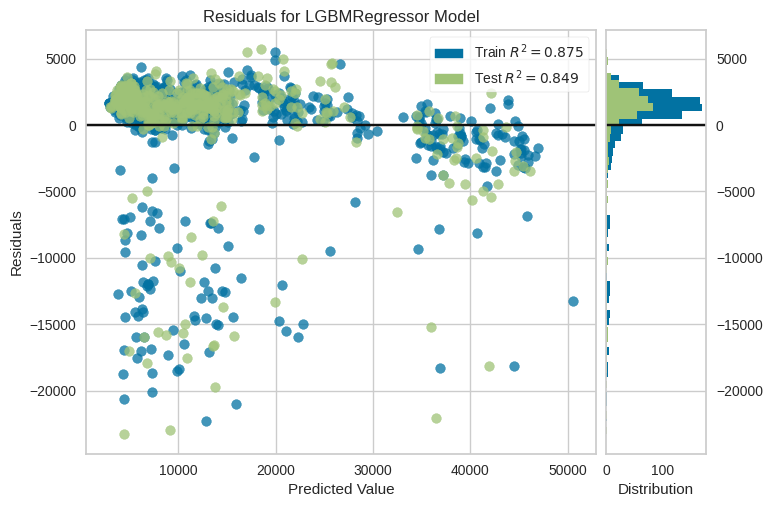

In [ ]:
#残差の確認
#縦：残差、横：予測値、右：分布
plot_model(tuned_lgbm)
#予測値$30000以下では残差大

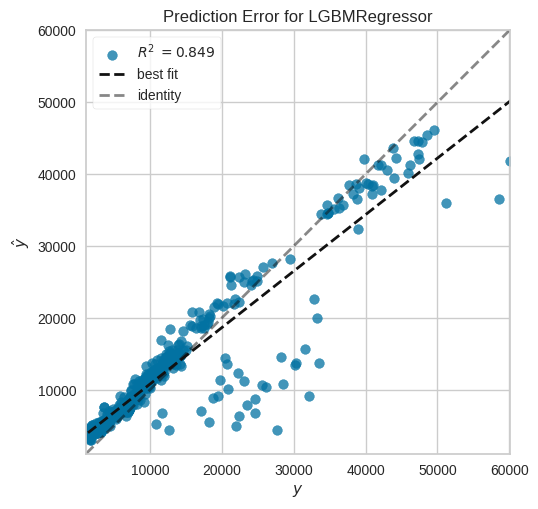

In [ ]:
plot_model(tuned_lgbm, plot = 'error')

#予測値$30000以下
#identityよりも下にプロット

SHAP（SHapley Additive exPlanations）は、\*\*個々の特徴量が予測にどれだけ貢献したか（寄与度）\*\*を計算する方法です。特に重要なのは、

> **モデルに依存せずに、特徴の寄与度を一貫した原理で算出できる** という点です。

---

✅ SHAPとは？（概要）

* SHAPは**ゲーム理論のShapley値**に基づいた手法。
* 各特徴を「プレイヤー」、モデル予測値を「ゲームの報酬」と見なし、
* 各特徴が**どれだけその予測値に貢献したか**を公平に配分します。

---

 🔍 SHAPの特徴寄与度の考え方（直感的な説明）

たとえば、ある住宅価格を予測するモデルがあり、「広さ」「立地」「築年数」などの特徴があります。

SHAPは、

* 「**広さがなかったらこの予測はどれくらい変わったか？**」
* 「**広さと立地があったら？築年数をあとから追加すると？**」

というふうに、**すべての特徴の組み合わせ（部分集合）を考慮しながら**、それぞれの特徴の「**平均的な貢献度**」を求めます。

---

 🧠 SHAP値の計算方法（理論）

 Shapley値の数式（簡略版）：

$$
\phi_i = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|! \cdot (|N|-|S|-1)!}{|N|!} \cdot [f(S \cup \{i\}) - f(S)]
$$

* $N$：全特徴の集合
* $S$：特徴の部分集合（iを除く）
* $f(S)$：特徴Sだけを使ったときのモデルの予測
* $\phi_i$：特徴iの寄与度（SHAP値）

つまり、

* **ある特徴iを、他の特徴の組み合わせに加えたときに予測がどれだけ変わるか**
* これを **全ての特徴の組み合わせにわたって平均化** した値が SHAP値です。

---

 🔧 モデル非依存性について

SHAPは**理論上どんなモデルにも適用できます**（＝**モデル非依存** or **モデルアグノスティック**）
ただし、計算コストの問題があるため、実際には：

| モデルタイプ             | 方法              | 補足                          |
| ------------------ | --------------- | --------------------------- |
| 任意のモデル             | **Kernel SHAP** | モデルをブラックボックスとしてSHAP値を近似（遅い） |
| ツリーベース（例：LightGBM） | **Tree SHAP**   | SHAP値を高速かつ正確に計算できる（効率的）     |

---

 ⚠️ 注意点

* SHAP値の正確な計算は**特徴数が増えると指数的に計算量が増える**ため、

  * 実用では近似手法（Kernel SHAPなど）を使用。
* 「特徴を外した時のモデル出力」が必要なので、**モデルの再評価が必要になる**（特にKernel SHAP）。

---

 ✅ まとめ

| 項目       | 説明                                                  |
| -------- | --------------------------------------------------- |
| SHAPとは   | 各特徴の\*\*貢献度（寄与度）\*\*をゲーム理論ベースで定量化する方法               |
| 特徴の寄与度計算 | **全ての特徴の組み合わせを考慮して平均的な貢献度を出す**                      |
| モデル依存性   | 理論上モデル非依存（Kernel SHAP）、ただし高速化のためモデル依存手法（Tree SHAP）も |
| メリット     | 一貫性・公平性・モデル解釈性の高さ                                   |
| デメリット    | 計算量が多く、近似が必要になることがある                                |




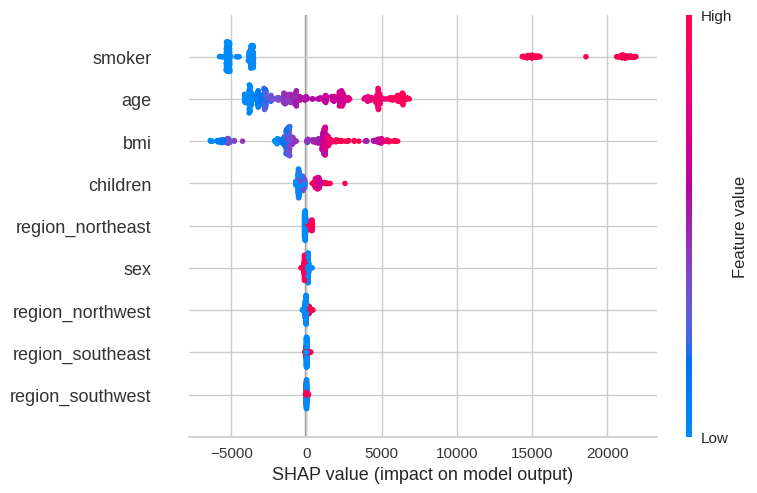

In [ ]:
#対象全体にたいする寄与度(SHAP)
interpret_model(tuned_lgbm)

#smoker,age,bmiの影響大（保険料の上昇）

In [ ]:
#1番目の顧客のSHAP値
interpret_model(tuned_lgbm, plot = 'reason', observation = 1)

#年齢が大きな押上要因で、喫煙が大きな引き下げ要因

### AutoMLによる分類

？糖尿病の可能性が高いひとは誰？

In [ ]:
#データセット
from pycaret.datasets import get_data
data = get_data('diabetes')

#Class variable(whether diabetes 0:No,1:Yes)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#前処理
from pycaret.classification import *
cls1 = setup(data, target = 'Class variable', session_id=1)

,Description,Value
0,Session id,1
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
#モデル構築と比較
#fold=5:k分割法を5回行う->4つ学習データ、1つテストデータを5回繰り返す

best_model = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7803,0.8301,0.6205,0.7132,0.6609,0.5002,0.5048,0.2220
lda,Linear Discriminant Analysis,0.7803,0.8326,0.5993,0.7188,0.6507,0.4937,0.4996,0.0320
lr,Logistic Regression,0.7785,0.8335,0.5993,0.7142,0.6489,0.4901,0.4956,1.6000
ridge,Ridge Classifier,0.7785,0.8322,0.5940,0.7162,0.6460,0.4884,0.4946,0.0320
catboost,CatBoost Classifier,0.7747,0.8386,0.6155,0.7105,0.6519,0.4881,0.4959,2.2100
nb,Naive Bayes,0.7692,0.8208,0.6366,0.6790,0.6553,0.4825,0.4845,0.0300
xgboost,Extreme Gradient Boosting,0.7616,0.7968,0.6097,0.6726,0.6361,0.4606,0.4641,0.0940
et,Extra Trees Classifier,0.7598,0.8290,0.5835,0.6835,0.6234,0.4507,0.4571,0.3040
lightgbm,Light Gradient Boosting Machine,0.7524,0.8020,0.6101,0.6562,0.6296,0.4448,0.4472,0.1340
gbc,Gradient Boosting Classifier,0.7468,0.8138,0.5940,0.6510,0.6178,0.4300,0.4334,0.1680


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
#ファインチューニング　lightbgm

print('初期設定：10-fold')
lgbm = create_model('lightgbm',10)#k-fold 10回


#ハイパーパラメータを3通り試行してF1を最大化
print('グリッドサーチを用いたハイパーパラメータチューニング')
tuned_lgbm = tune_model(lgbm, n_iter=3, optimize = 'F1')

#ハイパーパラメータの表示
print('チューニング済みパラメータ')
tuned_lgbm

初期設定：10-fold


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.8060,0.3684,0.7000,0.4828,0.3170,0.3476
1,0.7407,0.8015,0.4737,0.6923,0.5625,0.3874,0.4014
2,0.7037,0.8015,0.6316,0.5714,0.6000,0.3656,0.3668
3,0.7778,0.8556,0.6842,0.6842,0.6842,0.5128,0.5128
4,0.7593,0.7865,0.5789,0.6875,0.6286,0.4524,0.4561
5,0.7037,0.7564,0.5789,0.5789,0.5789,0.3504,0.3504
6,0.6667,0.7459,0.4211,0.5333,0.4706,0.2322,0.2357
7,0.8113,0.8254,0.7222,0.7222,0.7222,0.5794,0.5794
8,0.6981,0.7857,0.6111,0.5500,0.5789,0.3447,0.3458


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

グリッドサーチを用いたハイパーパラメータチューニング


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.8496,0.4211,0.6154,0.5000,0.2998,0.3107
1,0.7963,0.8180,0.6316,0.7500,0.6857,0.5367,0.5410
2,0.7963,0.8647,0.6842,0.7222,0.7027,0.5479,0.5484
3,0.7963,0.8511,0.7368,0.7000,0.7179,0.5587,0.5591
4,0.7778,0.8075,0.6316,0.7059,0.6667,0.5008,0.5025
5,0.7222,0.7774,0.5789,0.6111,0.5946,0.3836,0.3839
6,0.7037,0.7564,0.5263,0.5882,0.5556,0.3344,0.3355
7,0.7736,0.8619,0.6667,0.6667,0.6667,0.4952,0.4952
8,0.7547,0.7952,0.6667,0.6316,0.6486,0.4605,0.4609


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 3 candidates, totalling 30 fits


チューニング済みパラメータ


LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=26, min_child_weight=0.001, min_split_gain=0.8,
               n_estimators=230, n_jobs=-1, num_leaves=100, objective=None,
               random_state=1, reg_alpha=0.005, reg_lambda=4, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
#ファインチューニング　rf
print('初期設定：10-fold')
rf = create_model('rf',10)#k-fold 10回


#ハイパーパラメータを5通り試行してF1を最大化
print('グリッドサーチを用いたハイパーパラメータチューニング')
tuned_rf = tune_model(rf, n_iter=3, optimize = 'F1')#->過学習

#ハイパーパラメータの表示
print('チューニング済みパラメータ')
tuned_rf

初期設定：10-fold


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.8173,0.4737,0.7500,0.5806,0.4236,0.4456
1,0.8333,0.8579,0.6316,0.8571,0.7273,0.6112,0.6260
2,0.8148,0.8556,0.6842,0.7647,0.7222,0.5840,0.5860
3,0.8148,0.8647,0.7368,0.7368,0.7368,0.5940,0.5940
4,0.7778,0.8203,0.5789,0.7333,0.6471,0.4882,0.4954
5,0.7778,0.8068,0.6316,0.7059,0.6667,0.5008,0.5025
6,0.7222,0.8105,0.5263,0.6250,0.5714,0.3682,0.3711
7,0.8679,0.8651,0.7222,0.8667,0.7879,0.6931,0.6992
8,0.7736,0.8008,0.6111,0.6875,0.6471,0.4812,0.4830


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

グリッドサーチを用いたハイパーパラメータチューニング


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.7827,0.5789,0.6875,0.6286,0.4524,0.4561
1,0.6852,0.7436,0.5789,0.5500,0.5641,0.3180,0.3182
2,0.6111,0.7579,0.6316,0.4615,0.5333,0.2136,0.2213
3,0.7778,0.8767,0.6842,0.6842,0.6842,0.5128,0.5128
4,0.8704,0.8692,0.8421,0.8000,0.8205,0.7192,0.7197
5,0.7963,0.7759,0.6842,0.7222,0.7027,0.5479,0.5484
6,0.7037,0.7699,0.4737,0.6000,0.5294,0.3175,0.3223
7,0.8491,0.8913,0.8333,0.7500,0.7895,0.6723,0.6746
8,0.6604,0.8040,0.8333,0.5000,0.6250,0.3484,0.3868


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 3 candidates, totalling 30 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
チューニング済みパラメータ


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

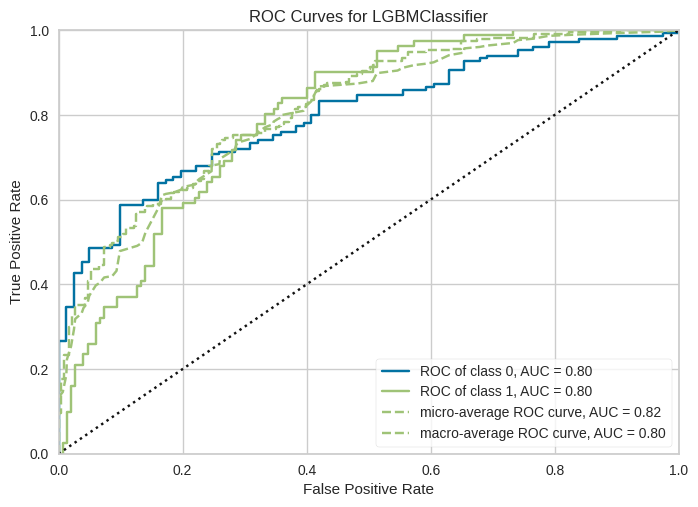

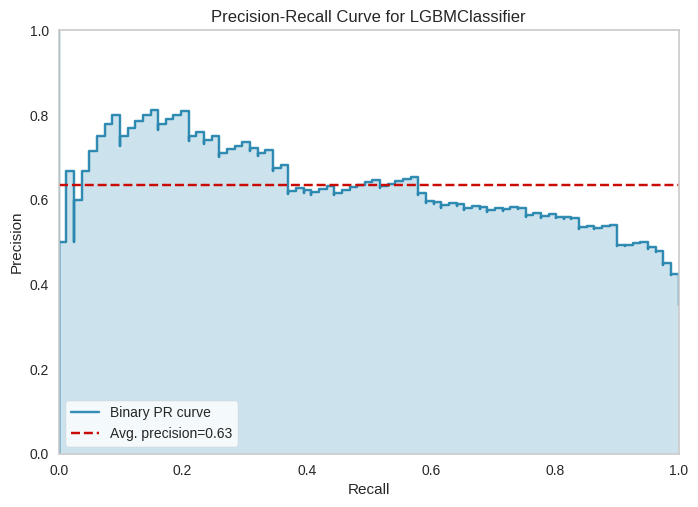

In [ ]:
#ROC曲線の下側の面積AUCの出力
#閾値(の確率を「どの値を超えたら陽性と判断するか？」というルール)を0から1に動かしたときの　縦：真陽性、横：偽陽性
plot_model(tuned_lgbm)
'''
ROC-AUCは1に近いと予測精度が高い
今回は0.8前後
しかし、正例の割合が少なければ偽陽性率が上がりにくく、AUCが減少しずらい
そのような場合はPR-AUC(下側の面積)を使用
'''
plot_model(tuned_lgbm,plot='pr')
#破線は再現率にわたる平均の適合率

✅ 閾値を 0.5 に設定した場合：

* 0.5 以上 → 陽性（1）と分類
* 0.5 未満 → 陰性（0）と分類

| サンプル | 予測確率 | 判定（0.5閾値） | 実際のラベル | 結果      |
| ---- | ---- | --------- | ------ | ------- |
| A    | 0.9  | 1         | 1      | 真陽性（TP） |
| B    | 0.6  | 1         | 0      | 偽陽性（FP） |
| C    | 0.4  | 0         | 1      | 偽陰性（FN） |
| D    | 0.2  | 0         | 0      | 真陰性（TN） |

---

 🔷 2. ROC曲線とは？

ROC曲線は、「**閾値を0から1まで少しずつ変えて、TPRとFPRをプロット**」した曲線です。

* **縦軸**：真陽性率（Recall, TPR）＝ TP / (TP + FN)
* **横軸**：偽陽性率（FPR）＝ FP / (FP + TN)

---

🔷 3. AUCとは？

AUC（Area Under the Curve）は、**ROC曲線の下の面積**です。

* 値の範囲：0 ～ 1

  * 1：完璧な分類
  * 0.5：ランダム（コイントスと同じ）
  * 0：逆の予測（悪すぎ）

---

 🔷 4. AUCが高い≠常に良い：クラス不均衡の注意点

例：陽性（正例）が10%、陰性（負例）が90%の場合
→ 偽陽性（FP）が少なく見えて、AUCが高くなりやすい（FPR = FP / (FP + TN) の分母が大きい）

 ⚠️ このような時にROC-AUCは過大評価される！

---

 🔷 5. PR曲線とPR-AUCの導入

PR曲線は以下をプロット：

* **縦軸**：適合率（Precision）＝ TP / (TP + FP)
* **横軸**：再現率（Recall）＝ TP / (TP + FN)

クラス不均衡に強く、**陽性に注目した評価**になります。

---

 🔶 まとめ図（イメージ）：

```
閾値（Threshold）を0→1に上げていくと…

ROC曲線：FPR vs TPR
PR曲線 ：Recall vs Precision

→ 面積（AUC）が大きいほど、モデルの性能が良い
→ クラス不均衡なら PR-AUC の方が信頼できる
```

---

 🛠 PyCaretの例

```python
plot_model(tuned_lgbm)  # ROC曲線 & AUC
plot_model(tuned_lgbm, plot='pr')  # PR曲線 & PR-AUC
```

破線（dashed line）は **ベースライン（ランダム分類）**や**平均適合率**などを示します。

---

 🔚 補足：式の一覧

* **真陽性率（TPR / Recall）**：

  $$
  \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
  $$

* **偽陽性率（FPR）**：

  $$
  \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
  $$

* **適合率（Precision）**：

  $$
  \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
  $$


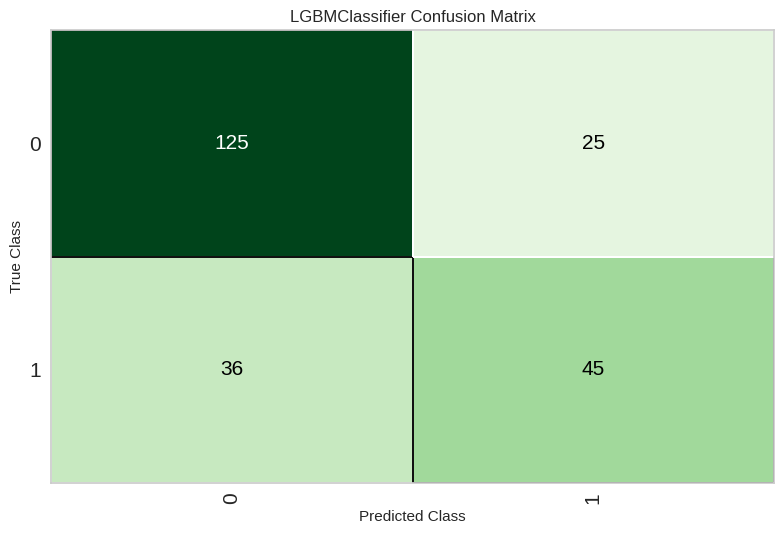

In [ ]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')
#true 0:1=150:81=50:27->おおむね均衡

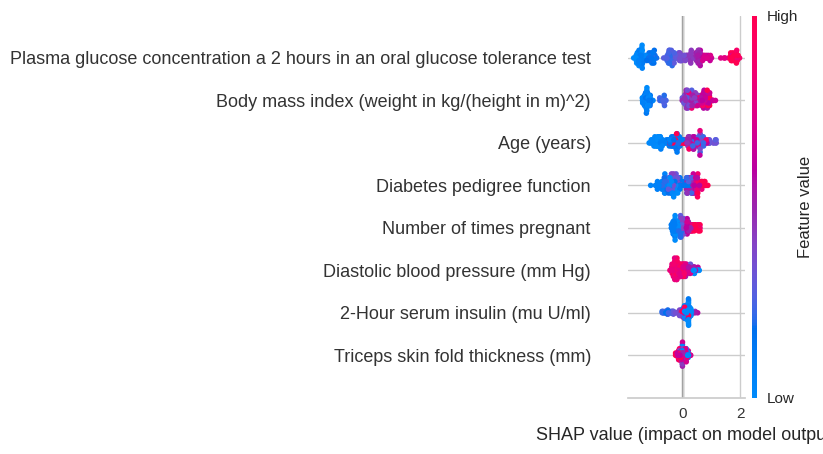

In [ ]:
interpret_model(tuned_lgbm)

In [ ]:
interpret_model(tuned_lgbm, plot = 'reason', observation = 1)

### 説明可能なAI


精度を上げつつ、解釈性を上げたい<br>


*   モデルの単純化
*   具体例での説明
*   変数重要度の説明
*   局所的説明（寄与度など）



In [ ]:
!pip install pycaret
!pip install pycaret[analysis]
!pip install shap
!pip install numpy
!pip install werkzeug

In [ ]:
!pip install explainerdashboard

In [ ]:
dashboard(lgbm,display_format='inline')

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...
Building ExplainerDashboard..
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr a

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>